In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def state_odes_system(x, t, cs, ce, ci, cz, mu, beta, gamma, phi, kappa, N):
    s = x[0]
    e = x[1]
    i = x[2]
    z = x[3]

    # g function
    incidence_rate = cs*ci*N/(s*cs + e*ce + i*ci + z*cz)

    # System S-E-I-R
    dsdt = -1*incidence_rate*beta*s*(i/N) + mu*N - mu*s
    dedt = incidence_rate*beta*s*(i/N) - (kappa + mu)*e
    didt = kappa*e + phi*z*(i/N) - (gamma + mu)*i
    dzdt = gamma*i - phi*z*(i/N) - mu*z

    return [dsdt, dedt, didt, dzdt]


def solve_odes_system_projection(x0, t0, t_max, cs, ce, ci, cz, steps, mu, beta, gamma, phi, kappa, N):
    """
    Solve the classical system with initial conditions
    """

    t = np.linspace(t0, t0 + t_max, steps*t_max + 1)
    x = odeint(state_odes_system, x0, t, args=(cs, ce, ci, cz, mu, beta, gamma, phi, kappa, N))

    s = x[:, 0]
    e = x[:, 1]
    i = x[:, 2]
    z = x[:, 3]

    return s, e, i, z

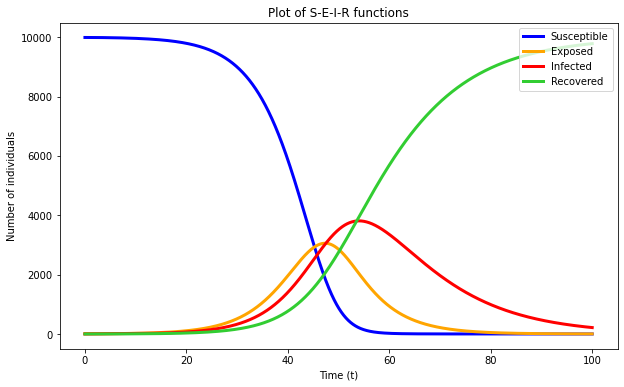

In [61]:
# Perform a simulation
mu = 0
gamma = 0.08
beta = 0.25
phi = 0
kappa = 0.15

### Simulation parameters
t_max = 100
steps = 100
x00 = [9990, 10, 0, 0]
N = sum(x00)

cs = 10
ce = 8
ci = 2
cz = 6

s, e, i, z = solve_odes_system_projection(x00, 0, t_max, cs, ce, ci, cz, steps, mu, beta, gamma, phi, kappa, N)
t = np.linspace(0, t_max, len(s))

plt.plot(t, s, label="Susceptible", color='blue', linewidth=3)
plt.plot(t, e, label="Exposed", color='orange', linewidth=3)
plt.plot(t, i, label="Infected", color='red', linewidth=3)
plt.plot(t, z, label="Recovered", color='limegreen', linewidth=3)
plt.title(f"Plot of S-E-I-R functions")
plt.xlabel("Time (t)")
plt.ylabel("Number of individuals")
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (10, 6)
plt.show()